# Regressão polinomial

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset=pd.read_csv('Exercicio12Salarios.csv', sep=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [3]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
#criamos a variável independente (X) e dependente (y).

X = dataset.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y = dataset.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
#Treinando o modelo para grau(degree)=2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, 'Salário (US$)')

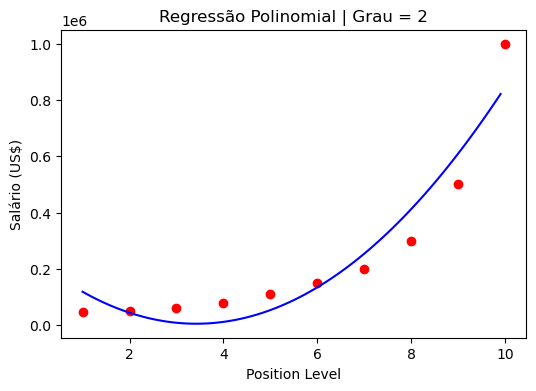

In [7]:
#Visualizando os dados para difernetes polinomios
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

# Gráfico grau 2
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(X, y, color='red')
ax.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
ax.set_title('Regressão Polinomial | Grau = 2')
ax.set_xlabel('Position Level')
ax.set_ylabel('Salário (US$)')

In [8]:
#Prevendo o valor para grau 2
lin_reg.predict(poly_reg.fit_transform(np.array([[6.5]])))

array([189498.10606061])

Text(0, 0.5, 'Salário (US$)')

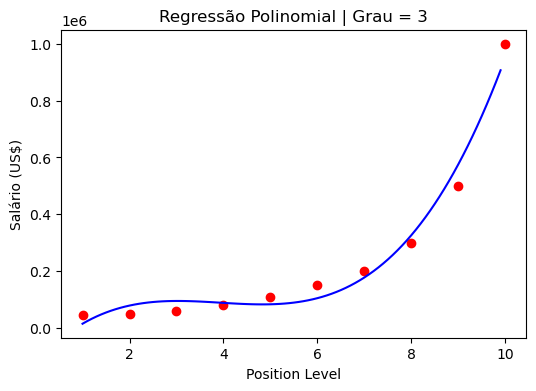

In [9]:
#Treinando o modelo para grau(degree)=3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Gráfico grau 3
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(X, y, color='red')
ax.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
ax.set_title('Regressão Polinomial | Grau = 3')
ax.set_xlabel('Position Level')
ax.set_ylabel('Salário (US$)')

In [10]:
#Prevendo o valor para grau 3
lin_reg.predict(poly_reg.fit_transform(np.array([[6.5]])))

array([133259.46969697])

Text(0, 0.5, 'Salário (US$)')

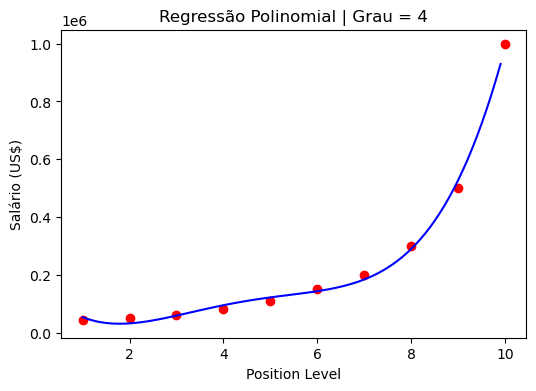

In [11]:
#Treinando o modelo para grau(degree)=4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Gráfico grau 4
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(X, y, color='red')
ax.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
ax.set_title('Regressão Polinomial | Grau = 4')
ax.set_xlabel('Position Level')
ax.set_ylabel('Salário (US$)')

In [12]:
#Prevendo o valor para grau 4
lin_reg.predict(poly_reg.fit_transform(np.array([[6.5]])))


array([158862.45265153])

# Support Vector Regression

In [13]:
#Não precisamos ler os dados novamente pois é o mesmo dataset da última vez

#transformando a variável y, que tem uma dimensão, em uma matriz
y = y.reshape((len(y),1))
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [14]:
# Normalização de y
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()

y = sc_y.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [15]:
# Normalização da variável X
sc_X = StandardScaler()

X = sc_X.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [16]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(X, y.ravel())

SVR()

In [17]:
#Prevendo um Novo Resultado

#Importante: Como tudo está normalizado, se usarmos o valor 6.5 como número para ele prever teremos  
#um valor errado pois o 6.5 não está normalizado

regressor.predict([[6.5]])

array([0.01158103])

In [18]:
#Normalizando o 6.5

# Obs: o reshape(-1, 1) serve para apenas para transformar o array
# unidimensional (1D) em um array bidimensional (2D).

#Ainda teremos um valor estranho pois a saída também esta normalizada e não é esse dado que queremos...
regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)



array([[-0.27861589]])

In [19]:
#Corrigindo a sáida normalizada

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))



array([[170370.0204065]])

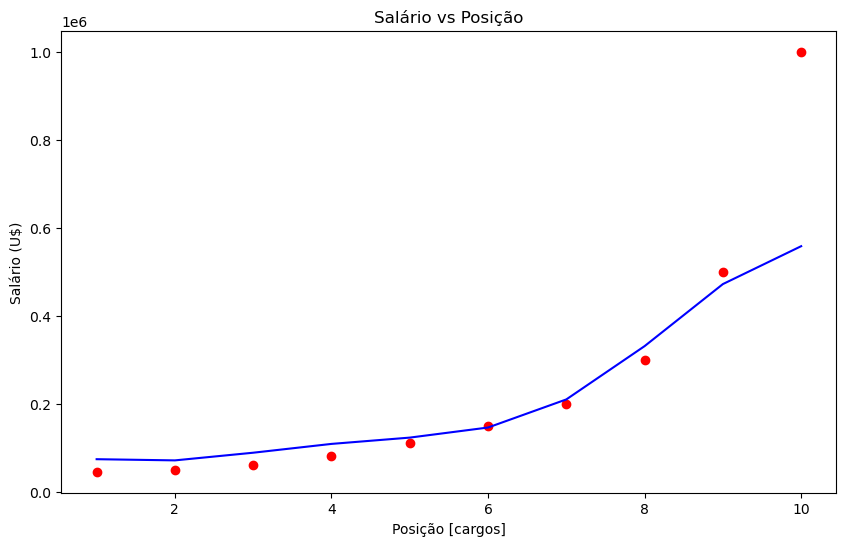

In [20]:
#Demonstrando no gráfico:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=sc_X.inverse_transform(X), y=sc_y.inverse_transform(y), color='red')
ax.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),
        color='blue')

ax.set_title('Salário vs Posição')

ax.set_ylabel('Salário (U$)')
ax.set_xlabel('Posição [cargos]')

plt.show()

# Árvore de decisão

In [21]:
#Aqui vou ler novamente os dados pois eles foram normalizados para a regressão polinomial

dataset=pd.read_csv('Exercicio12Salarios.csv', sep=',')

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#Treinando o modelo em todo o dataset
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [22]:
#Prevendo um resultado:

print(regressor.predict([[6.5]]))

[150000.]


Text(0, 0.5, 'Salário (US$)')

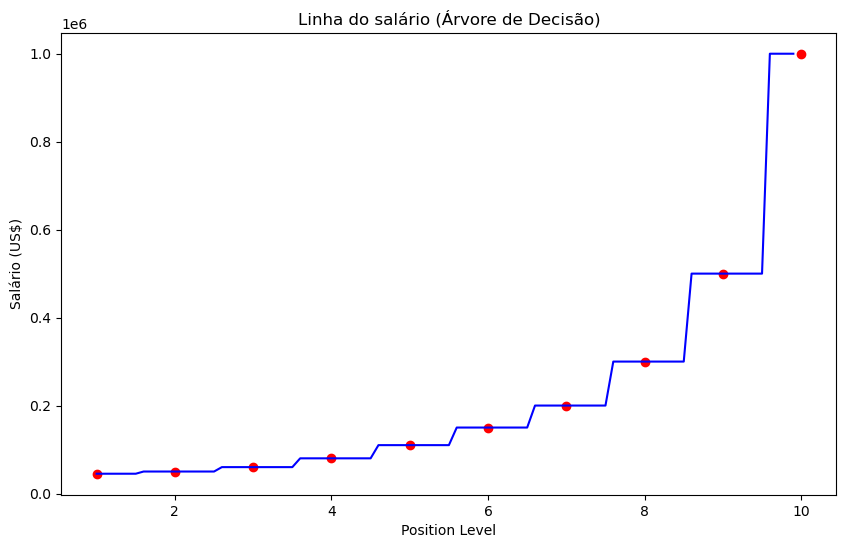

In [23]:
#Visualizando no gráfico como foi a tomada de decisão:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

ax.plot(X_grid, regressor.predict(X_grid), color = 'blue')
ax.scatter(X, y, color='red')
ax.set_title('Linha do salário (Árvore de Decisão)')
ax.set_xlabel('Position Level')
ax.set_ylabel('Salário (US$)')

# Floresta aleatória

In [24]:
#Não precisamos ler os dados novamente pois é o mesmo dataset da última vez

#Treinando o modelo em todo o dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [25]:
print(regressor.predict([[6.5]]))

[180000.]


Text(0, 0.5, 'Salário (US$)')

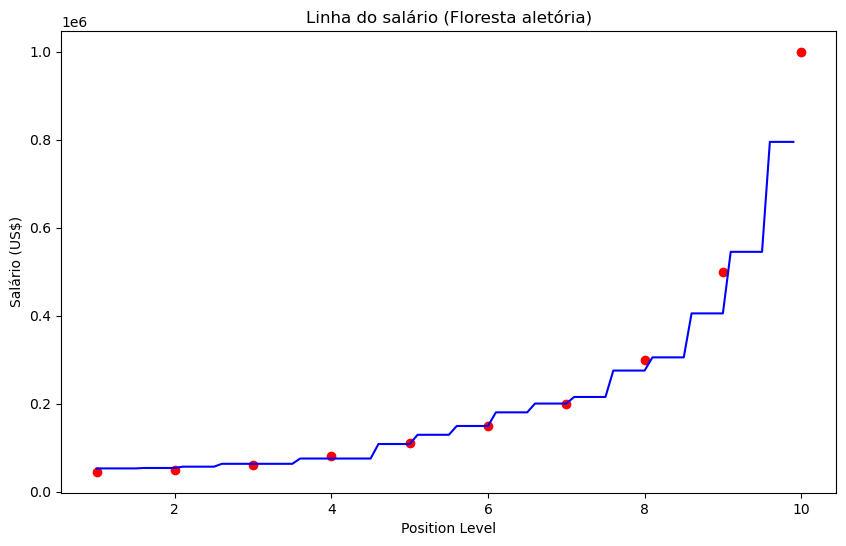

In [26]:
#Visualizando no gráfico como foi a tomada de decisão:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

ax.plot(X_grid, regressor.predict(X_grid), color = 'blue')
ax.scatter(X, y, color='red')
ax.set_title('Linha do salário (Floresta aletória)')
ax.set_xlabel('Position Level')
ax.set_ylabel('Salário (US$)')